# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 101 | Advanced Representation and Reasoning
- **Topic:** Topic 2.1 Introduction to Probability in AI
- **Due date:** September 17, 2024 | 3:00 PM - 5:00 PM

# **`Laboratory Exercise #2`**

In [14]:
#@title # **`Exercise 1: Joint, Marginal, and Conditional Probability Calculations`**
def joint_probability(p_A, p_B):
    """
    Compute the joint probability of two independent events A and B.

    Args:
    p_A (float): Probability of event A.
    p_B (float): Probability of event B.

    Returns:
    float: Joint probability P(A and B) = P(A) * P(B).
    str: Error message if invalid input.
    """
    if not (0 <= p_A <= 1 and 0 <= p_B <= 1):
        return "Invalid input: Probabilities must be between 0 and 1."
    return p_A * p_B

def marginal_probability(p_A, p_B):
    """
    Compute marginal probability P(A or B) assuming independence.

    Args:
    p_A (float): Probability of event A.
    p_B (float): Probability of event B.

    Returns:
    float: Marginal probability P(A or B).
    str: Error message if invalid input.
    """
    jp = joint_probability(p_A, p_B)
    if isinstance(jp, str):  # If joint probability returned an error
        return jp
    return p_A + p_B - jp

def conditional_probability(p_A_and_B, p_A):
    """
    Compute conditional probability P(B|A).

    Args:
    p_A_and_B (float): Joint probability P(A and B).
    p_A (float): Probability of event A.

    Returns:
    float: Conditional probability P(B|A) = P(A and B) / P(A).
    str: Error message if invalid input.
    """
    if p_A == 0:
        return "Conditional probability is undefined (P(A) cannot be zero)."
    return p_A_and_B / p_A

#@markdown - ## **Enter the probability values:**
p_A = 0.3 #@param {type:"number"}
p_B = 0.4 #@param {type:"number"}

#@markdown - ## **Assume we know the conditional probability P(B|A):**
p_B_given_A = 0.8 #@param {type:"number"}

# Display the results
joint_prob = joint_probability(p_A, p_B)
print(f"Joint Probability: {joint_prob}")

marginal_prob = marginal_probability(p_A, p_B)
print(f"Marginal Probability: {marginal_prob}")

# Assuming joint probability is P(A and B) and using it for conditional probability
if isinstance(joint_prob, float):  # If joint probability was calculated successfully
    cond_prob = conditional_probability(joint_prob, p_A)
    print(f"Conditional Probability P(B|A): {cond_prob}")
else:
    print("Cannot compute conditional probability due to invalid joint probability.")

# Provide feedback based on the correct results
if joint_prob == p_A * p_B:
    print("Correct! The joint probability was calculated using P(A and B) = P(A) * P(B).")
else:
    print("Incorrect. Remember, for independent events, P(A and B) = P(A) * P(B).")

Joint Probability: 0.12
Marginal Probability: 0.58
Conditional Probability P(B|A): 0.4
Correct! The joint probability was calculated using P(A and B) = P(A) * P(B).


In [15]:
#@title # **`Exercise 2: Bayesian Inference for Disease Probability`**

def bayesian_inference(p_positive_given_disease, p_disease, p_positive_given_no_disease):
    """
    Performs Bayesian inference to update the probability of having a disease given a positive test result.

    Args:
    p_positive_given_disease (float): The probability of a positive test given the person has the disease (P(Positive | Disease)).
    p_disease (float): The prior probability of having the disease (P(Disease)).
    p_positive_given_no_disease (float): The probability of a positive test given the person does not have the disease (P(Positive | No Disease)).

    Returns:
    float: The updated probability of having the disease given a positive test result (P(Disease | Positive)).
    """

    # Prior probability: P(Disease)
    prior_disease = p_disease

    # Likelihood: P(Positive Test | Disease)
    likelihood_positive_given_disease = p_positive_given_disease

    # Prior probability of not having the disease: P(No Disease)
    prior_no_disease = 1 - prior_disease

    # Likelihood of a positive test given no disease: P(Positive Test | No Disease)
    likelihood_positive_given_no_disease = p_positive_given_no_disease

    # Total probability of a positive test: P(Positive Test)
    p_positive_test = (likelihood_positive_given_disease * prior_disease) + \
                      (likelihood_positive_given_no_disease * prior_no_disease)

    # Posterior probability: P(Disease | Positive Test)
    p_disease_given_positive = (likelihood_positive_given_disease * prior_disease) / p_positive_test

    return p_disease_given_positive

#@markdown - ### Given probabilities:
p_positive_given_disease = 0.90 #@param {type:"number"}
p_disease = 0.01 #@param {type:"number"}
p_positive_given_no_disease = 0.05 #@param {type:"number"}

# Perform Bayesian inference to calculate the probability of having the disease given a positive test
p_disease_given_positive = bayesian_inference(p_positive_given_disease, p_disease, p_positive_given_no_disease)

# Display the result
print(f"Probability of having the disease given a positive test result: {p_disease_given_positive:.4f}")

# Feedback
if p_disease_given_positive > 0.5:
    print("Based on the Bayesian calculation, it is likely the person has the disease.")
else:
    print("Based on the Bayesian calculation, it is unlikely the person has the disease.")


Probability of having the disease given a positive test result: 0.1538
Based on the Bayesian calculation, it is unlikely the person has the disease.


Average return after 1000 iterations: $523.00


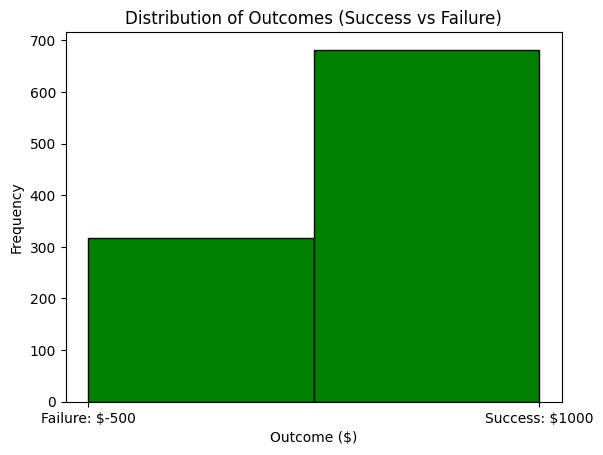

The default probability leads to a balanced outcome.


In [16]:
#@title # **`Exercise 3: Decision-Making Under Uncertainty`**
import numpy as np
import matplotlib.pyplot as plt

def simulate_investment(num_simulations, p_success, reward_success, penalty_failure):
    """
    Simulates a decision-making process for investment options and returns the average outcome.

    Parameters:
    - num_simulations (int): Number of simulations (iterations) to run.
    - p_success (float): Probability of success (range: 0 to 1).
    - reward_success (float): Reward (profit) for a successful outcome.
    - penalty_failure (float): Penalty (loss) for a failed outcome.

    Returns:
    - float: The average return after all simulations.
    - list: A list of outcomes for each simulation (success or failure).
    """
    total_return = 0  # Initialize total return
    outcomes = []     # To store individual outcomes for each simulation

    # Simulate the decision-making process
    for _ in range(num_simulations):
        if np.random.rand() < p_success:  # If success (random number less than p_success)
            total_return += reward_success
            outcomes.append(reward_success)
        else:  # If failure
            total_return += penalty_failure
            outcomes.append(penalty_failure)

    average_return = total_return / num_simulations  # Calculate the average return
    return average_return, outcomes

#@markdown - # Enter the Parameters:
num_simulations = 1000 #@param {type:"number"} # Number of iterations (simulations)
p_success = 0.7 #@param {type:"number"} # Probability of success
reward_success = 1000 #@param {type:"number"} # Reward for success
penalty_failure = -500 #@param {type:"number"} # Penalty for failure

# Simulate the investment decision-making process
average_return, outcomes = simulate_investment(num_simulations, p_success, reward_success, penalty_failure)

# Display the result
print(f"Average return after {num_simulations} iterations: ${average_return:.2f}")

# Plot the outcomes to visualize distribution of returns
plt.hist(outcomes, bins=2, edgecolor='black', color=['green'])
plt.title('Distribution of Outcomes (Success vs Failure)')
plt.xlabel('Outcome ($)')
plt.ylabel('Frequency')
plt.xticks([penalty_failure, reward_success], [f"Failure: ${penalty_failure}", f"Success: ${reward_success}"])
plt.show()

# Additional feedback on probability adjustments
if p_success > 0.7:
    print("Increasing the probability of success leads to higher average returns.")
elif p_success < 0.7:
    print("Decreasing the probability of success reduces the average return.")
else:
    print("The default probability leads to a balanced outcome.")


Given a humidity of 80.0% and cloud cover of 70.0%, the probability of rain is 0.21


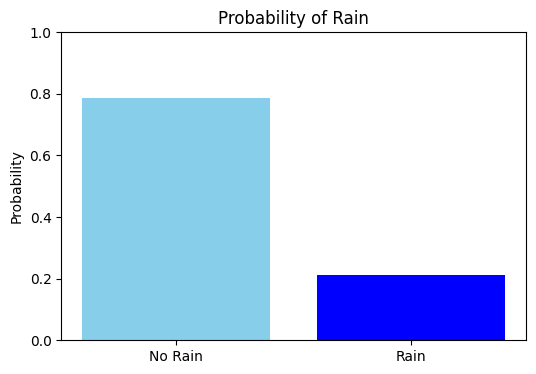

High humidity alone can significantly increase the chance of rain.


In [17]:
#@title # **`Exercise 4: Conditional Probability for Predicting Rain`**

import numpy as np
import matplotlib.pyplot as plt

def conditional_probability_rain(humidity, cloud_cover, p_rain=0.2):
    """
    Computes the conditional probability of rain given evidence (humidity and cloud cover).

    Parameters:
    - humidity (float): The percentage of humidity (0 to 1).
    - cloud_cover (float): The percentage of cloud cover (0 to 1).
    - p_rain (float): The prior probability of rain (default is 0.2, i.e., 20%).

    Returns:
    - float: The updated probability of rain given the evidence (humidity and cloud cover).
    """
    # Assume likelihood values based on empirical evidence or estimations.
    # Higher humidity and cloud cover make rain more likely.
    # The weights (0.8 and 0.6) represent the impact of these factors on rain prediction.
    likelihood_rain_given_evidence = (0.8 * humidity + 0.6 * cloud_cover) * p_rain

    # Calculate total probability, ensuring it is capped between 0 and 1.
    total_probability = min(1, max(0, likelihood_rain_given_evidence))

    return total_probability

# Interactive Scenario
#@markdown - **Adjust the values for humidity and cloud cover**
humidity = 0.8  #@param {type:"slider", min:0, max:1, step:0.01}  # Humidity percentage (0-100%)
cloud_cover = 0.7  #@param {type:"slider", min:0, max:1, step:0.01}  # Cloud cover percentage (0-100%)
p_rain = 0.2  #@param {type:"slider", min:0, max:1, step:0.01}  # Prior probability of rain

# Calculate the probability of rain given the inputs
probability_of_rain = conditional_probability_rain(humidity, cloud_cover, p_rain)

# Display the result
print(f"Given a humidity of {humidity*100}% and cloud cover of {cloud_cover*100}%, the probability of rain is {probability_of_rain:.2f}")

# Plotting the result
plt.figure(figsize=(6, 4))
labels = ['No Rain', 'Rain']
probabilities = [1 - probability_of_rain, probability_of_rain]
plt.bar(labels, probabilities, color=['skyblue', 'blue'])
plt.title('Probability of Rain')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()

# Feedback to explain how inputs affect the prediction
if humidity > 0.75 and cloud_cover > 0.75:
    print("Both high humidity and significant cloud cover increase the chance of rain.")
elif humidity > 0.75:
    print("High humidity alone can significantly increase the chance of rain.")
elif cloud_cover > 0.75:
    print("A high cloud cover alone can slightly increase the chance of rain.")
else:
    print("Lower values for humidity and cloud cover decrease the likelihood of rain.")


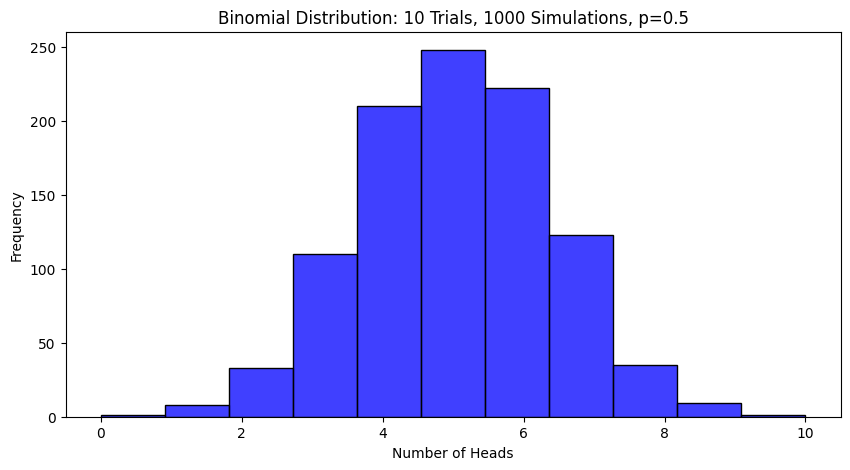

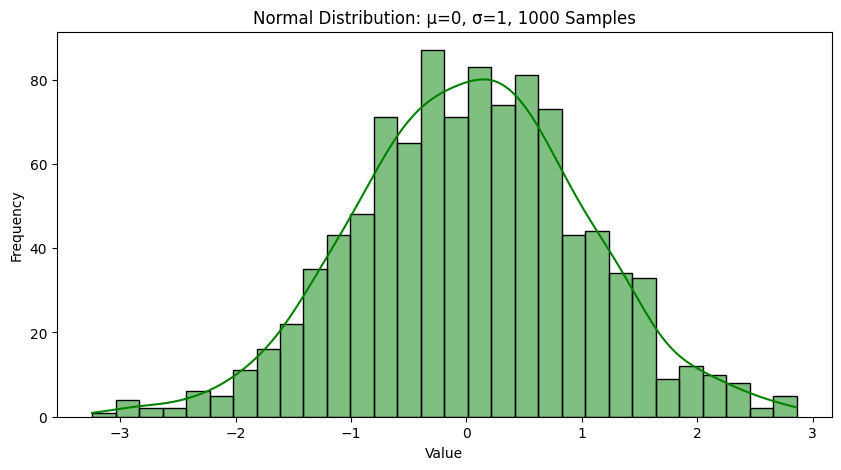

The distribution is symmetric because the probability of heads is 0.5.
Changing the number of trials from 10 affects the spread. More trials increase the spread of the distribution.
Adjusting the mean (μ) shifts the center of the normal distribution, while changing the standard deviation (σ) affects the spread of the data.


In [18]:
#@title # **`Exercise 5: Probability Distributions Visualization`**

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_binomial(n_trials, p_head, n_simulations):
    """
    Simulates a binomial distribution of coin flips and returns the outcomes.

    Parameters:
    - n_trials (int): Number of coin flips per simulation.
    - p_head (float): Probability of flipping heads (range: 0 to 1).
    - n_simulations (int): Number of simulations (e.g., 1000 coin flips).

    Returns:
    - array: Outcomes of the binomial simulation (number of heads per simulation).
    """
    outcomes = np.random.binomial(n=n_trials, p=p_head, size=n_simulations)
    return outcomes

def simulate_normal(mu, sigma, size):
    """
    Simulates a normal distribution with specified mean and standard deviation.

    Parameters:
    - mu (float): Mean of the distribution.
    - sigma (float): Standard deviation of the distribution.
    - size (int): Number of samples to generate.

    Returns:
    - array: Outcomes of the normal distribution.
    """
    outcomes = np.random.normal(mu, sigma, size)
    return outcomes

# Interactive Parameters for binomial distribution
#@markdown - # **Enter the Parameters for Binomial Distribution**
n_trials = 10 #@param {type:"number"} # Number of trials (coin flips)
p_head = 0.5 #@param {type:"number"}  # Probability of getting heads
n_simulations = 1000 #@param {type:"number"} # Number of simulations

# Simulate binomial distribution
binomial_outcomes = simulate_binomial(n_trials, p_head, n_simulations)

# Visualize the binomial distribution
plt.figure(figsize=(10, 5))
sns.histplot(binomial_outcomes, bins=n_trials+1, kde=False, color='blue', edgecolor='black')
plt.title(f'Binomial Distribution: {n_trials} Trials, {n_simulations} Simulations, p={p_head}')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.show()

# Interactive Parameters for normal distribution
#@markdown - # **Enter the Parameters for Normal Distribution**
mu = 0  #@param {type:"number"} # Mean of the normal distribution
sigma = 1  #@param {type:"number"} # Standard deviation of the normal distribution
size = 1000  #@param {type:"number"} # Number of samples

# Simulate normal distribution
normal_outcomes = simulate_normal(mu, sigma, size)

# Visualize the normal distribution
plt.figure(figsize=(10, 5))
sns.histplot(normal_outcomes, bins=30, kde=True, color='green', edgecolor='black')
plt.title(f'Normal Distribution: μ={mu}, σ={sigma}, {size} Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Feedback on how changing parameters affects the binomial distribution
if p_head == 0.5:
    print("The distribution is symmetric because the probability of heads is 0.5.")
elif p_head < 0.5:
    print("The distribution skews to the left, indicating more tails than heads.")
else:
    print("The distribution skews to the right, indicating more heads than tails.")

print(f"Changing the number of trials from {n_trials} affects the spread. More trials increase the spread of the distribution.")

# Feedback for the normal distribution
print(f"Adjusting the mean (μ) shifts the center of the normal distribution, while changing the standard deviation (σ) affects the spread of the data.")
